In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use(["science", "ieee", "no-latex"])


In [6]:
BBH_events = ["150914_095045", "151012_095443", "151226_033853", "170104_101158", "170121_212536", "170202_135657", "170304_163753", "170403_230611", "170608_020116", "170727_010430", "170729_185629",
"170809_082821", "170814_103043", "170818_022509", "170823_131358", "190404_142514", "190408_181802", "190412_053044", "190413_052954", "190413_134308", "190421_213856",
"190424_180648", "190427_180650", "190503_185404", "190512_180714", "190513_205428", "190514_065416", "190517_055101", "190519_153544", "190521_030229", "190521_074359",
"190527_092055", "190602_175927", "190620_030421", "190630_185205", "190701_203306", "190706_222641", "190707_093326", "190708_232457", "190719_215514", "190720_000836", "190725_174728",
"190727_060333", "190728_064510", "190731_140936", "190803_022701", "190805_105432", "190814_211039", "190828_063405", "190828_065509", "190910_112807", "190915_235702", "190916_200658",
"190924_021846", "190925_232845", "190926_050336", "190929_012149", "190930_133541", "191105_143521", "191109_010717", "191126_115259", "191127_050227", "191129_134029", "191204_110529",
"191204_171526", "191215_223052", "191216_213338", "191222_033537", "191224_043228", "191230_180458", "200106_134123", "200112_155838", "200128_022011",
"200129_065458", "200129_114245", "200202_154313", "200208_130117", "200209_085452", "200210_005122", "200214_223307", "200216_220804", "200219_094415", "200224_222234", "200225_060421",
"200302_015811", "200305_084739", "200306_093714", "200311_115853", "200316_215756", "200318_191337"]

In [3]:
event_name = "150914_095045"
post = h5py.File(f'posterior/GW{event_name}-PYCBC-POSTERIOR-IMRPhenomXPHM.hdf', 'r')
post.attrs["log_evidence"]

-255823.27596444587

In [4]:
post.attrs.keys()

<KeysViewHDF5 ['H1_analysis_segment', 'H1_likelihood_low_freq', 'H1_psd_segment', 'L1_analysis_segment', 'L1_likelihood_low_freq', 'L1_psd_segment', 'analyzed_detectors', 'approximant', 'dlog_evidence', 'f_lower', 'f_ref', 'filetype', 'log_evidence', 'model', 'remapped_params', 'run_end_time', 'run_start_time', 'sampler', 'sampling_params', 'static_params', 'trigger_time', 'variable_params']>

In [11]:
def get_single_BBH_exp_2nd(event_name, a_thr):
    post = h5py.File(
        f'posterior/GW{event_name}-PYCBC-POSTERIOR-IMRPhenomXPHM.hdf', 'r')
    s1_a = np.array(post["samples"]["spin1_a"])
    s2_a = np.array(post["samples"]["spin2_a"])
    return np.sum(s1_a > a_thr)/len(s1_a) + np.sum(s2_a > a_thr)/len(s2_a)


get_single_BBH_exp_2nd(BBH_events[0], 0.68)


0.319183855411922

In [21]:
def get_Pa(BBH_events, a_thr):
    N_large_spin = np.sum(np.array([get_single_BBH_exp_2nd(event, a_thr) for event in BBH_events])) 
    return N_large_spin / len(BBH_events) / 2

In [32]:
get_Pa(BBH_events, 0.4)

0.5548149383206931

In [33]:
get_Pa(BBH_events, 0.5)

0.43692799547347183

In [ ]:
get_Pa(BBH_events, 0.68)

0.24999186581374125

In [23]:
a_thrs = np.linspace(0, 1, 100)
Pas = [get_Pa(BBH_events, a_thr) for a_thr in a_thrs]


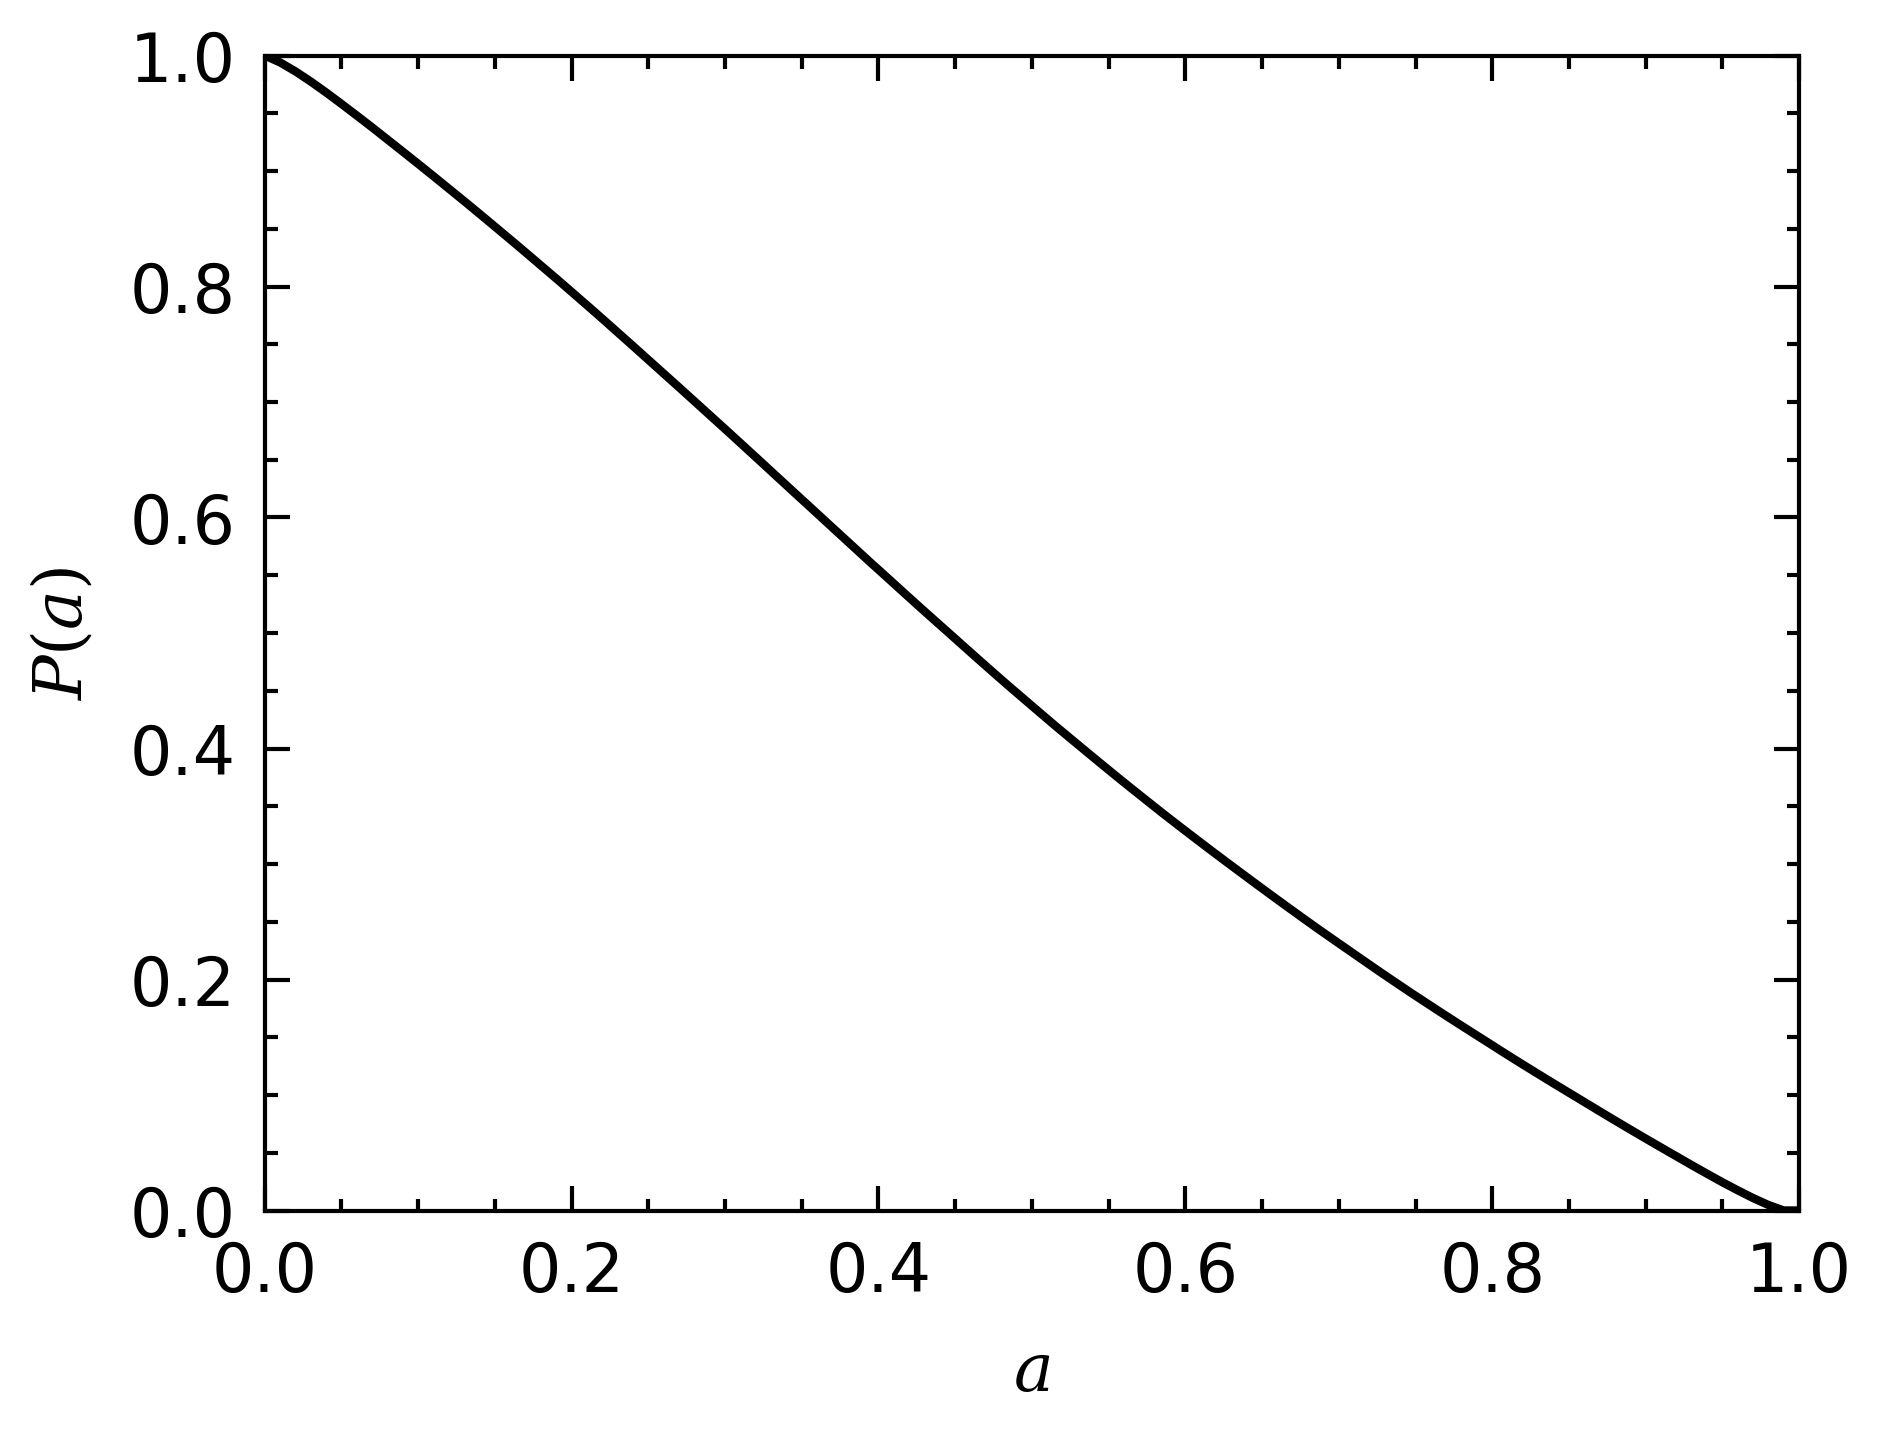

In [31]:
plt.plot(a_thrs, Pas)
plt.xlabel(r"$a$")
plt.ylabel(r"$P(a)$")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.savefig("Pa.pdf")
plt.show()

In [25]:
43*2/(180-43*2)

0.9148936170212766

In [26]:
s1_a = np.array(post["samples"]["spin2_a"])
np.sum(s1_a>0.68)/len(s1_a)

0.16667342059407544

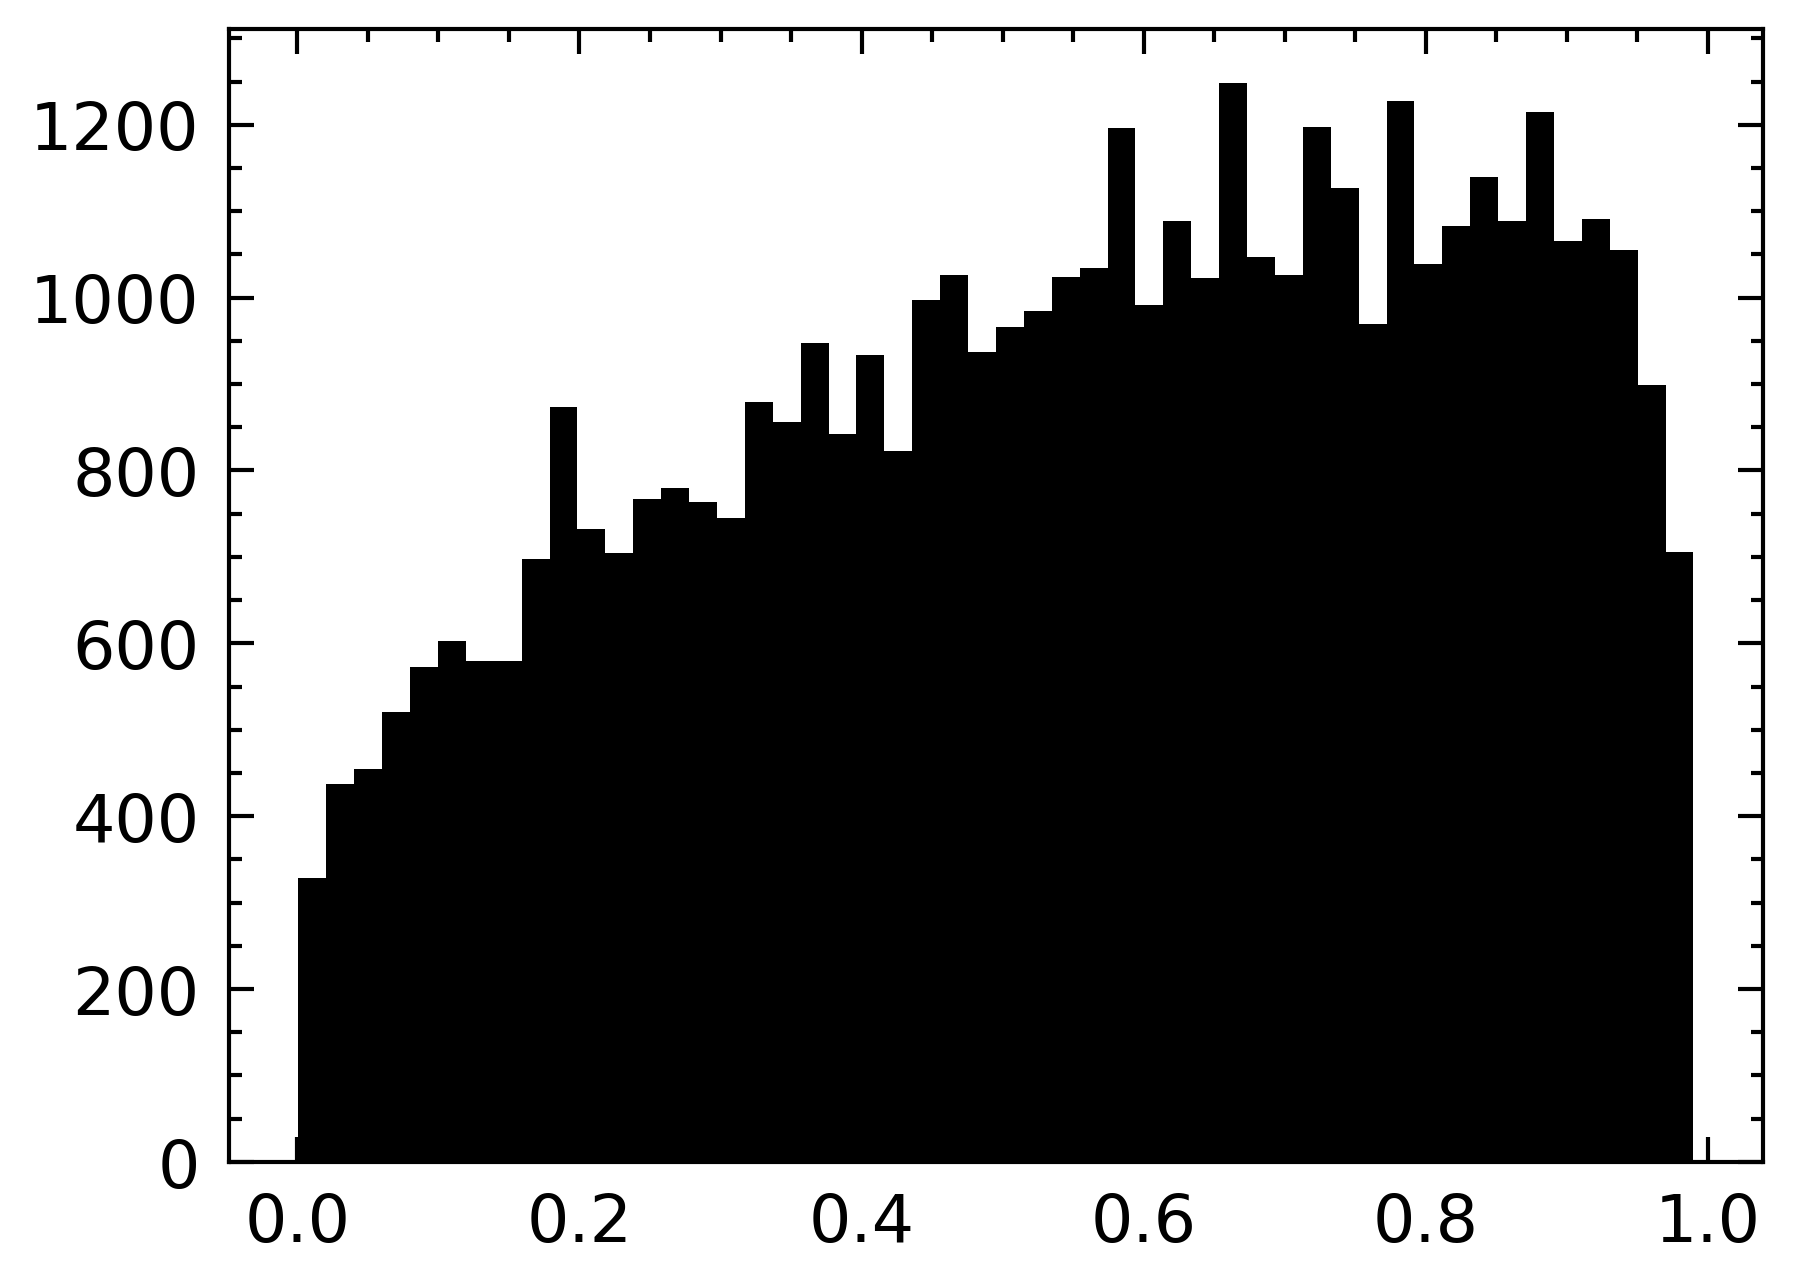

In [88]:
event_name = BBH_events[6]
post = h5py.File(f'posterior/GW{event_name}-PYCBC-POSTERIOR-IMRPhenomXPHM.hdf', 'r')

plt.hist(np.array(post["samples"]["spin1_a"]), bins=50, )
plt.show()

In [60]:
post["samples"].attrs['H1_lognl', 'L1_lognl', 'lognl']

<KeysViewHDF5 ['H1_lognl', 'L1_lognl', 'lognl']>

In [22]:
def get_log_evidence(event_name):
    post = h5py.File(f'posterior/GW{event_name}-PYCBC-POSTERIOR-IMRPhenomXPHM.hdf', 'r')
    return post.attrs["log_evidence"]

In [38]:
log_Z0 = get_log_evidence(BBH_events[0])
log_Zs = np.array([get_log_evidence(event) for event in BBH_events]) - log_Z0 

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


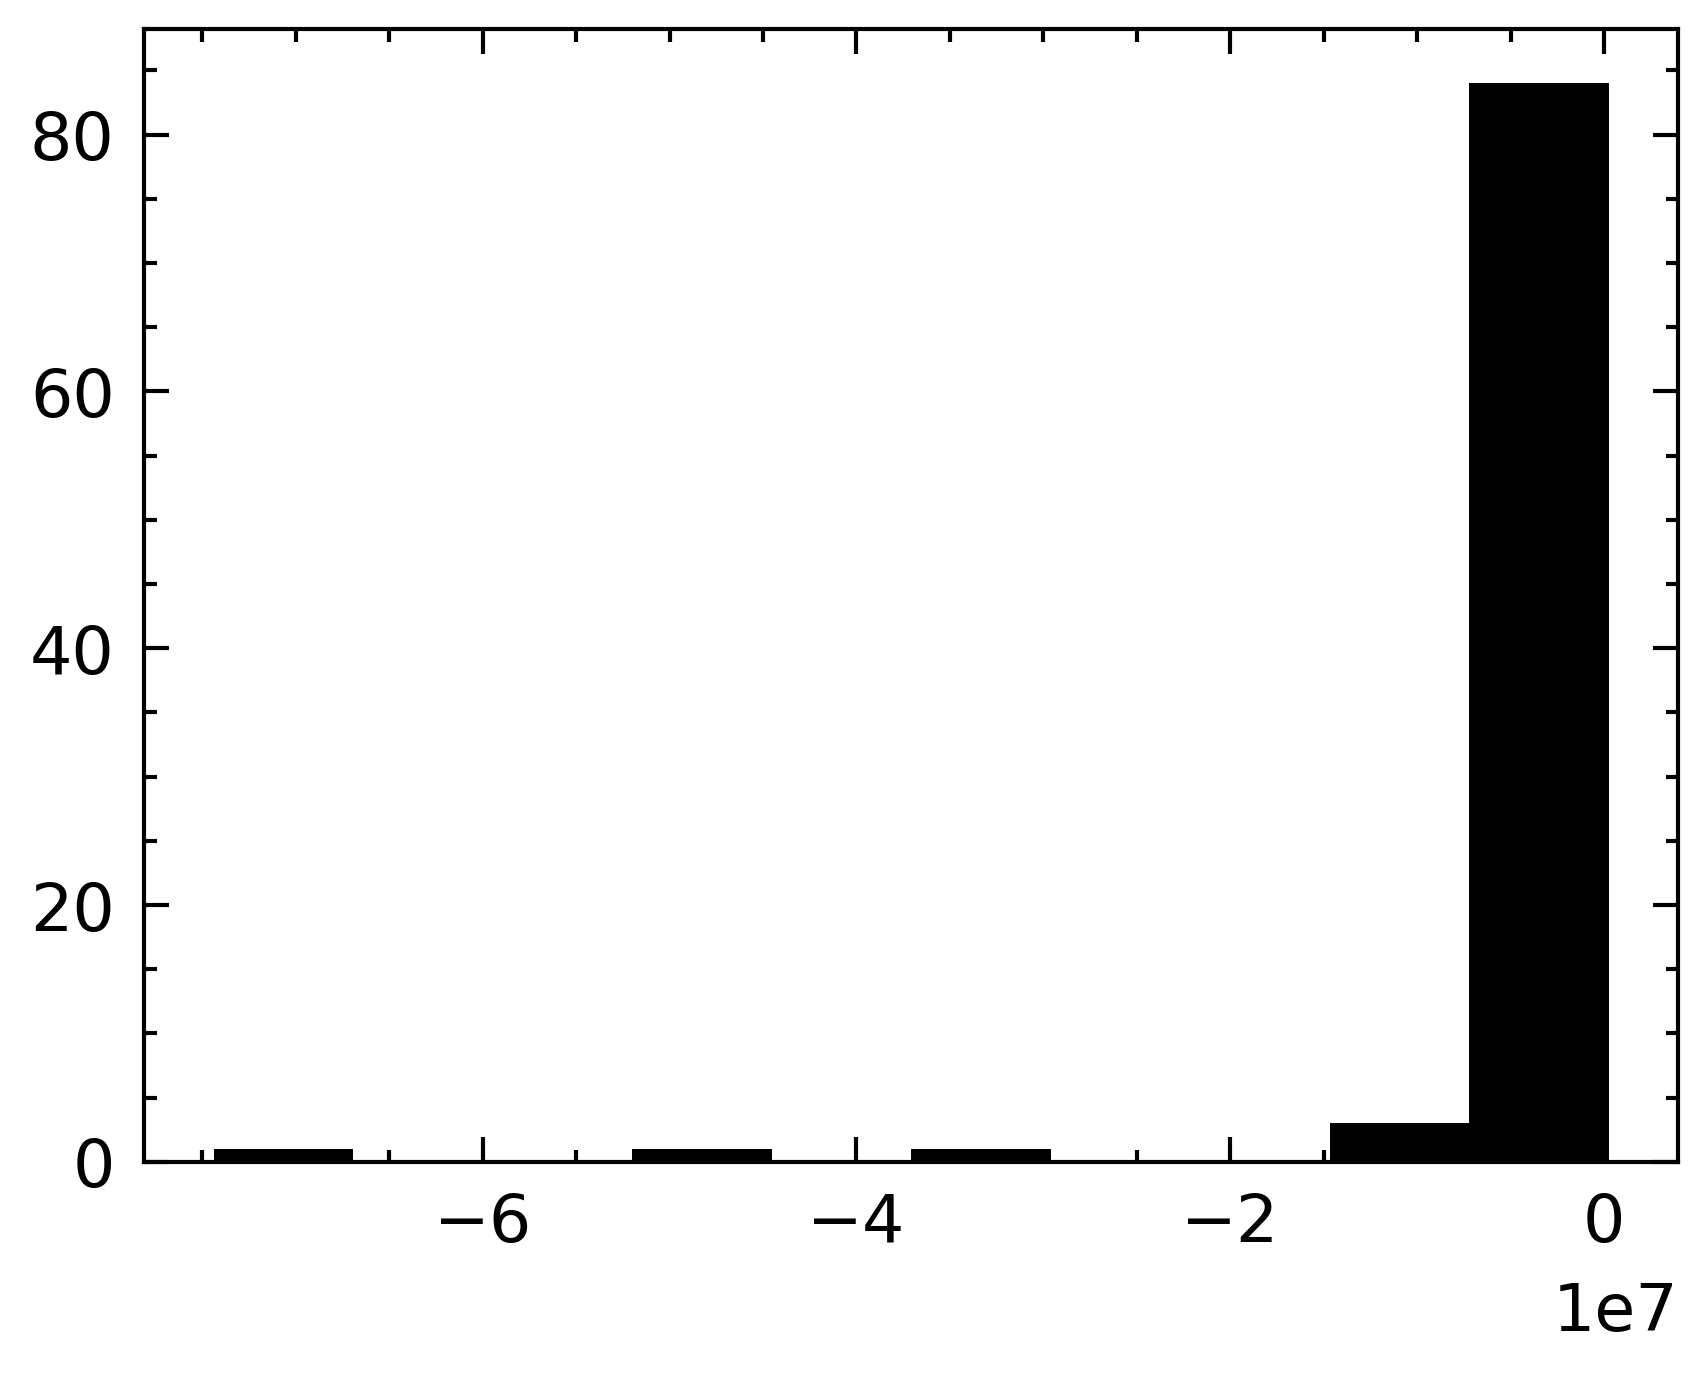

In [45]:
plt.hist(log_Zs)
plt.show()

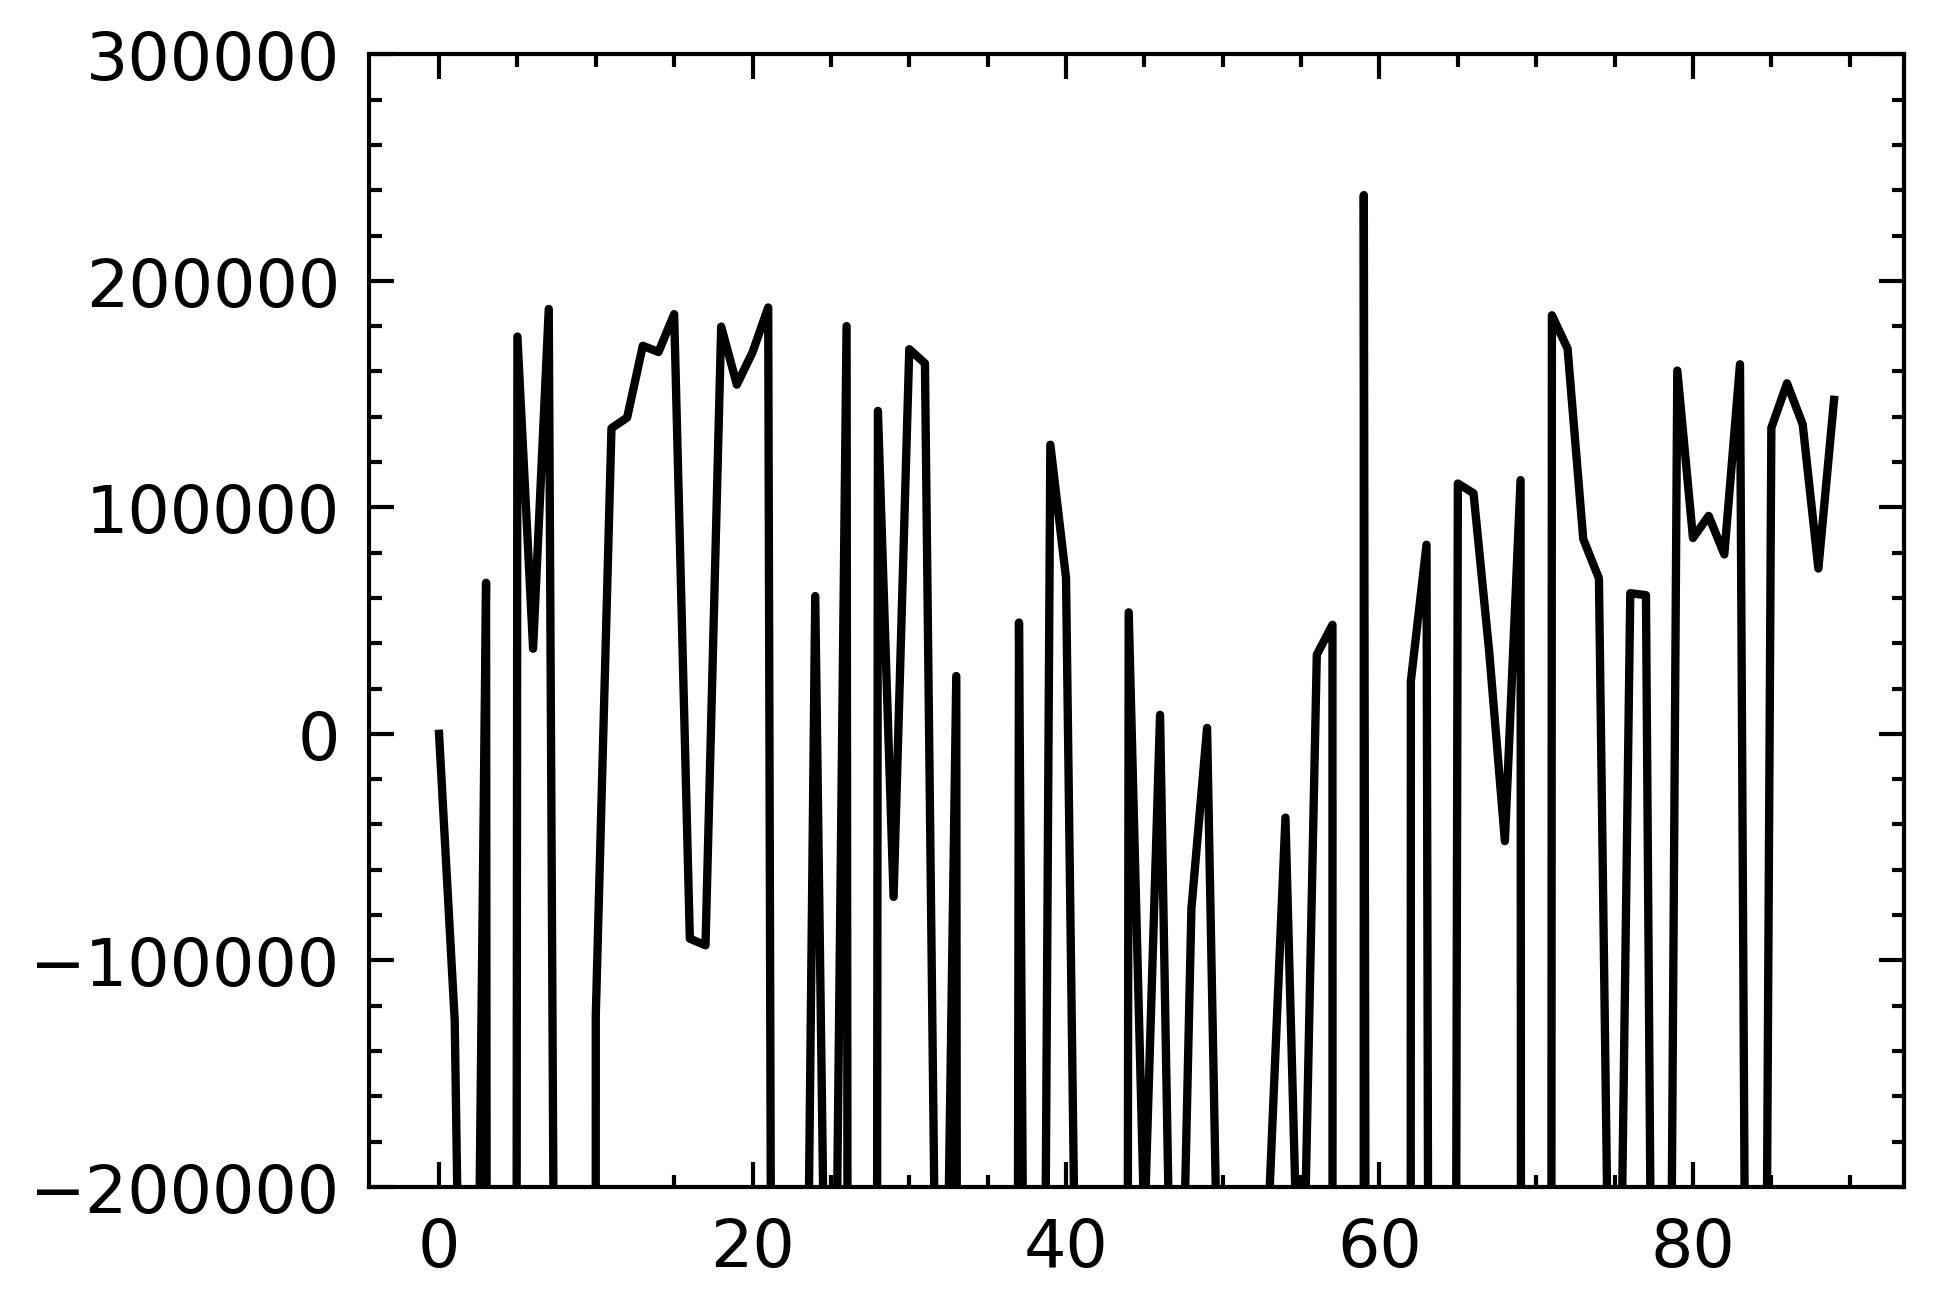

In [53]:
plt.plot(log_Zs)
plt.ylim(-2e5, 3e5)
plt.show()